# EDA for Education Spending and Economic Outcomes Research

In [18]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

df= pd.read_csv("/content/drive/MyDrive/Research Papers/XAI/Data/XAI_Ed_Spending_Data.csv")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Descriptive Statistics
key_columns = [
    "real GDP(in billion U.S. dollars)",
    "ENROLL",
    "TOTAL_EXPENDITURE",
    "CAPITAL_OUTLAY_EXPENDITURE"
]
data[key_columns].describe()

,real GDP(in billion U.S. dollars),ENROLL,TOTAL_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,850.000000,8.500000e+02,8.500000e+02,8.500000e+02
mean,298.499129,9.317748e+05,1.082518e+07,1.071797e+06
std,368.067299,1.115386e+06,1.363671e+07,1.525990e+06
min,23.020000,4.386600e+04,7.699230e+05,2.007000e+04
25%,70.652500,2.657458e+05,2.598134e+06,2.346425e+05
50%,175.840000,6.593620e+05,6.170692e+06,6.084985e+05
75%,359.590000,1.004686e+06,1.181249e+07,1.088743e+06
max,2427.890000,6.307022e+06,8.532013e+07,1.022366e+07


In [20]:

# Outliers Detection using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_info = {col: detect_outliers_iqr(data, col) for col in key_columns}
outliers_info


{'real GDP(in billion U.S. dollars)':           STATE  YEAR  real GDP(in billion U.S. dollars)   ENROLL  \
 4    California  2000                            1696.17  5941946   
 32     New York  2000                            1092.19  2861478   
 42        Texas  2000                             995.66  3965971   
 54   California  2001                            1692.32  6045030   
 82     New York  2001                            1112.79  2856277   
 92        Texas  2001                            1020.54  4021535   
 104  California  2002                            1722.52  6136915   
 132    New York  2002                            1106.15  2846068   
 142       Texas  2002                            1043.57  4112315   
 154  California  2003                            1790.00  6226552   
 182    New York  2003                            1110.61  2879228   
 192       Texas  2003                            1050.61  4201914   
 204  California  2004                            185

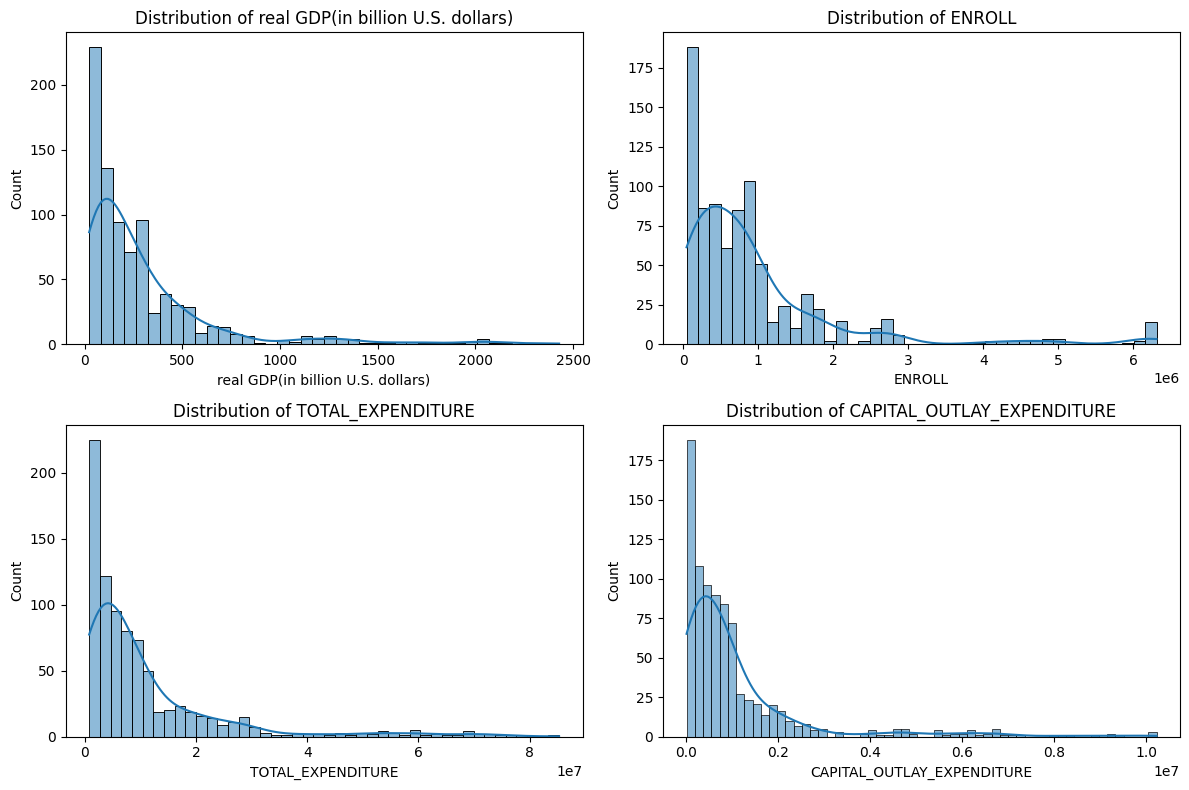

In [5]:

# Data Distribution (Histograms)
plt.figure(figsize=(12, 8))
for i, col in enumerate(key_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


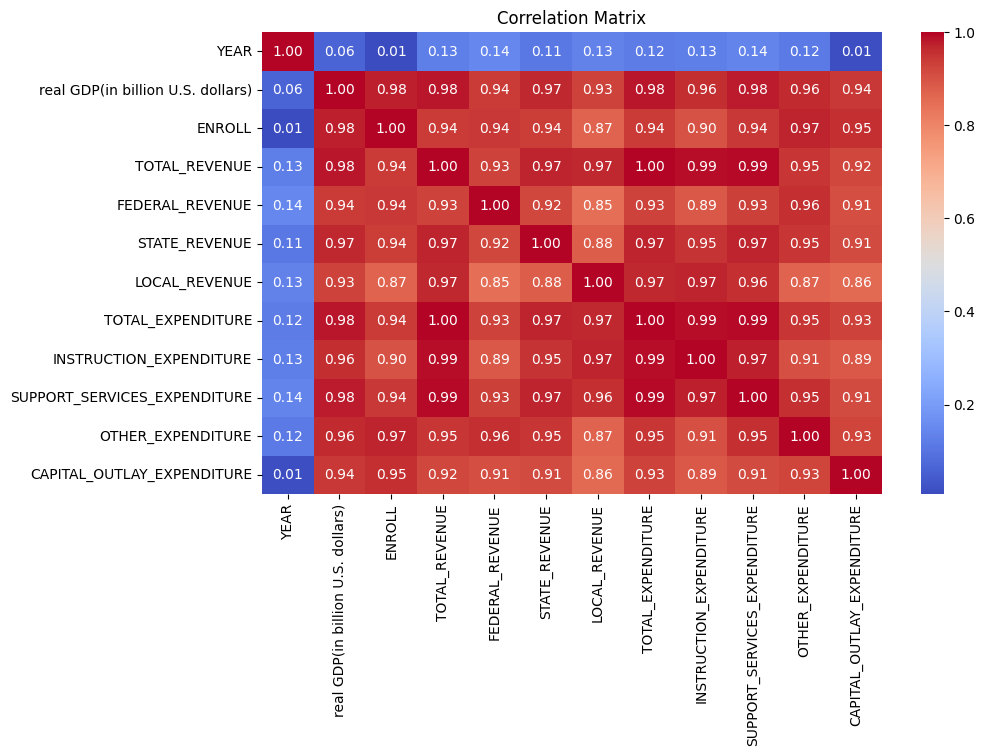

In [7]:
# Correlation Analysis
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<ipython-input-8-253b2402a433>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="YEAR", y="real GDP(in billion U.S. dollars)", ci=None)


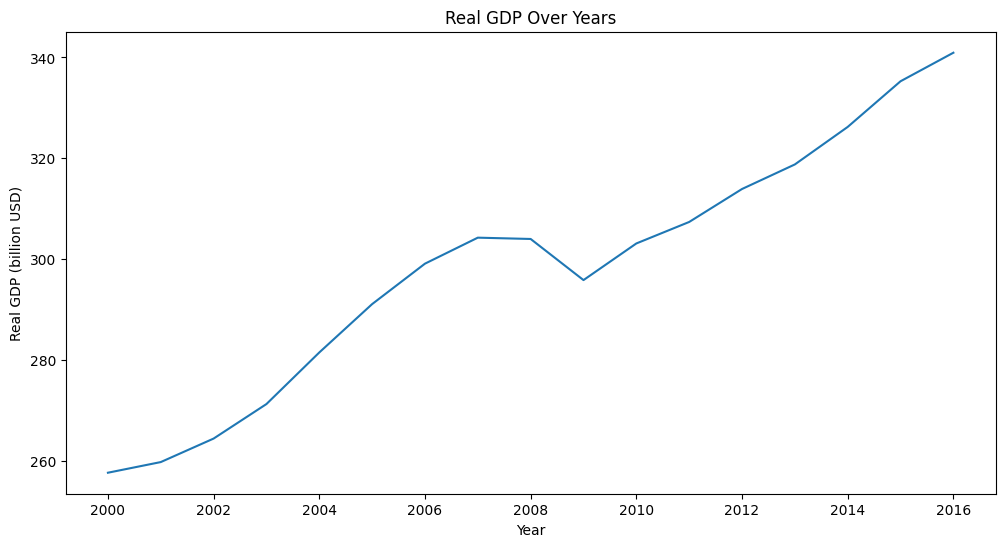

<ipython-input-8-253b2402a433>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="YEAR", y="CAPITAL_OUTLAY_EXPENDITURE", ci=None)


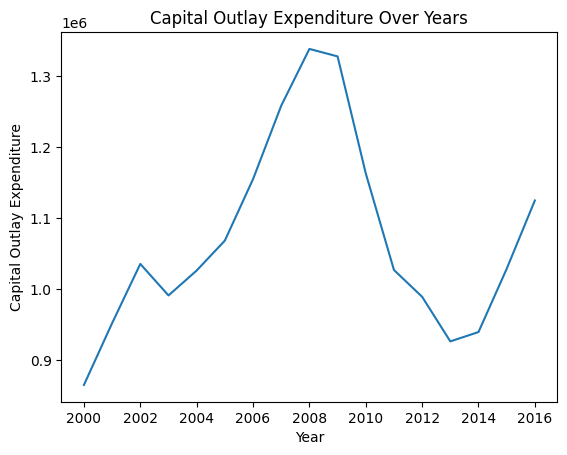

In [8]:

# Time-Series Analysis for key variables
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="YEAR", y="real GDP(in billion U.S. dollars)", ci=None)
plt.title("Real GDP Over Years")
plt.xlabel("Year")
plt.ylabel("Real GDP (billion USD)")
plt.show()

sns.lineplot(data=data, x="YEAR", y="CAPITAL_OUTLAY_EXPENDITURE", ci=None)
plt.title("Capital Outlay Expenditure Over Years")
plt.xlabel("Year")
plt.ylabel("Capital Outlay Expenditure")
plt.show()


# Feature Engineering for Education Spending Dataset

In [9]:
# Sort the data by STATE and YEAR for sequential operations
data_sorted = data.sort_values(by=["STATE", "YEAR"])

Creating Lagged Variables

In [10]:

# Adding lagged features for CAPITAL_OUTLAY_EXPENDITURE
for lag in [1, 2, 5]:
    data_sorted[f"CAPITAL_OUTLAY_EXPENDITURE_LAG_{lag}"] = data_sorted.groupby("STATE")[
        "CAPITAL_OUTLAY_EXPENDITURE"
    ].shift(lag)

Adding Derived Features

In [11]:

# Per Capita Expenditure
data_sorted["PER_CAPITA_EXPENDITURE"] = data_sorted["TOTAL_EXPENDITURE"] / data_sorted["ENROLL"]

# Ratios of Expenditure Categories
data_sorted["INSTRUCTION_EXPENDITURE_RATIO"] = (
    data_sorted["INSTRUCTION_EXPENDITURE"] / data_sorted["TOTAL_EXPENDITURE"]
)
data_sorted["SUPPORT_SERVICES_EXPENDITURE_RATIO"] = (
    data_sorted["SUPPORT_SERVICES_EXPENDITURE"] / data_sorted["TOTAL_EXPENDITURE"]
)
data_sorted["CAPITAL_OUTLAY_EXPENDITURE_RATIO"] = (
    data_sorted["CAPITAL_OUTLAY_EXPENDITURE"] / data_sorted["TOTAL_EXPENDITURE"]
)

Finalizing the Dataset

In [13]:
import os

# Create the directory if it doesn't exist
os.makedirs('/mnt/data', exist_ok=True)

# Selecting the required columns for modeling
final_columns = [
    "STATE", "YEAR", "real GDP(in billion U.S. dollars)",
    "ENROLL", "TOTAL_EXPENDITURE", "PER_CAPITA_EXPENDITURE",
    "INSTRUCTION_EXPENDITURE_RATIO", "SUPPORT_SERVICES_EXPENDITURE_RATIO",
    "CAPITAL_OUTLAY_EXPENDITURE_RATIO",
    "CAPITAL_OUTLAY_EXPENDITURE_LAG_1",
    "CAPITAL_OUTLAY_EXPENDITURE_LAG_2",
    "CAPITAL_OUTLAY_EXPENDITURE_LAG_5"
]
final_data = data_sorted[final_columns]

# Saving the final dataset to CSV
final_data.to_csv('/mnt/data/Final_Engineered_Data.csv', index=False)
final_data.head()

,STATE,YEAR,real GDP(in billion U.S. dollars),ENROLL,TOTAL_EXPENDITURE,PER_CAPITA_EXPENDITURE,INSTRUCTION_EXPENDITURE_RATIO,SUPPORT_SERVICES_EXPENDITURE_RATIO,CAPITAL_OUTLAY_EXPENDITURE_RATIO,CAPITAL_OUTLAY_EXPENDITURE_LAG_1,CAPITAL_OUTLAY_EXPENDITURE_LAG_2,CAPITAL_OUTLAY_EXPENDITURE_LAG_5
0,Alabama,2000,157.22,730184,5003267,6.852063,0.510009,0.263638,0.132694,NaN,NaN,NaN
50,Alabama,2001,156.85,728532,5086045,6.981224,0.522291,0.270203,0.106229,663903.0,NaN,NaN
100,Alabama,2002,160.42,726367,5147821,7.087080,0.528522,0.274795,0.096380,540284.0,663903.0,NaN
150,Alabama,2003,165.13,727900,5298932,7.279753,0.531638,0.287126,0.081579,496146.0,540284.0,NaN
200,Alabama,2004,176.63,730418,5450269,7.461849,0.527606,0.290014,0.082495,432279.0,496146.0,NaN


In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 849
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   STATE                               850 non-null    object 
 1   YEAR                                850 non-null    int64  
 2   real GDP(in billion U.S. dollars)   850 non-null    float64
 3   ENROLL                              850 non-null    int64  
 4   TOTAL_EXPENDITURE                   850 non-null    int64  
 5   PER_CAPITA_EXPENDITURE              850 non-null    float64
 6   INSTRUCTION_EXPENDITURE_RATIO       850 non-null    float64
 7   SUPPORT_SERVICES_EXPENDITURE_RATIO  850 non-null    float64
 8   CAPITAL_OUTLAY_EXPENDITURE_RATIO    850 non-null    float64
 9   CAPITAL_OUTLAY_EXPENDITURE_LAG_1    800 non-null    float64
 10  CAPITAL_OUTLAY_EXPENDITURE_LAG_2    750 non-null    float64
 11  CAPITAL_OUTLAY_EXPENDITURE_LAG_5    600 non-null  